In [1]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

from scanner import CurriculumScanner
from classes import *
from extraction_utils import *

In [2]:
# general settings
graph_everything = True

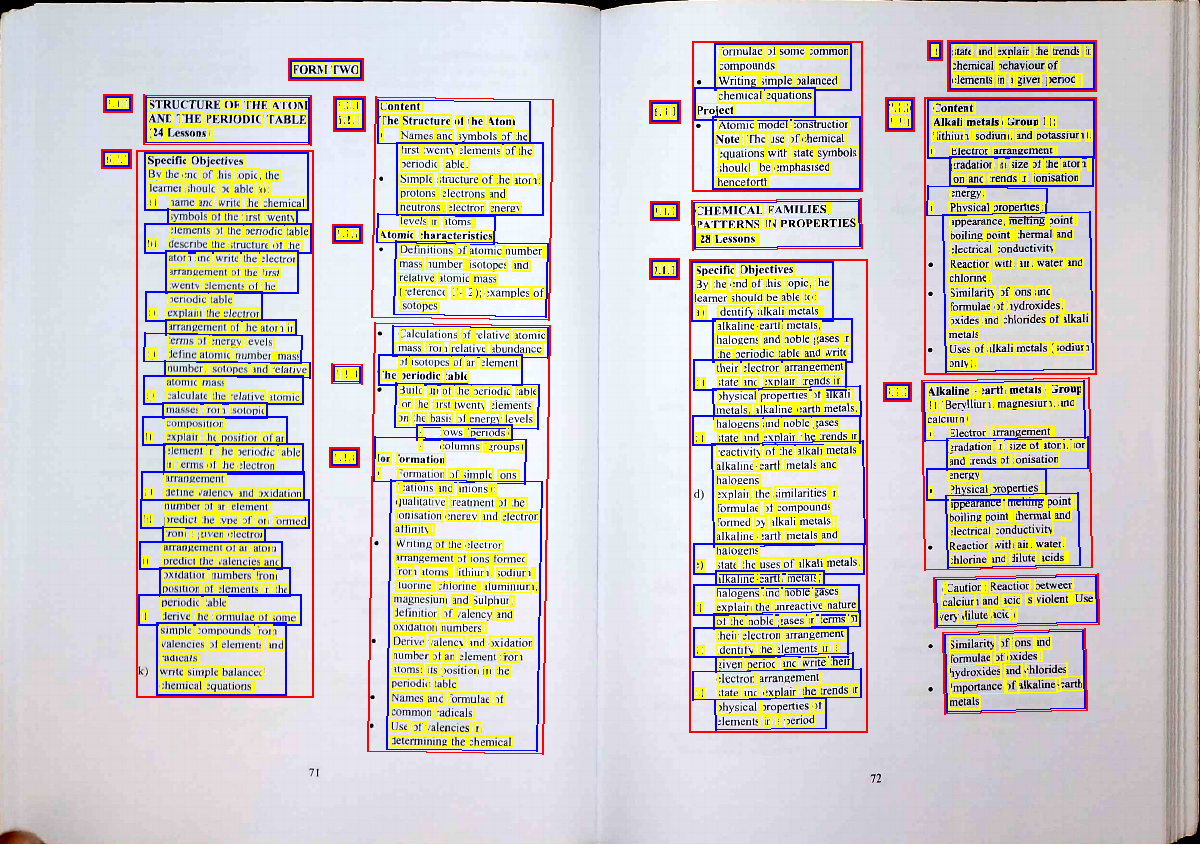

In [3]:
# load the data

doc = CurriculumScanner('inputs/KICD secondary curriculum volume II.pdf')
page_num = 40

img = PageImage(doc.get_page_image(page_num))

page_data = doc.get_page_data(page_num)

doc.draw_boxes(page_num) if graph_everything else None

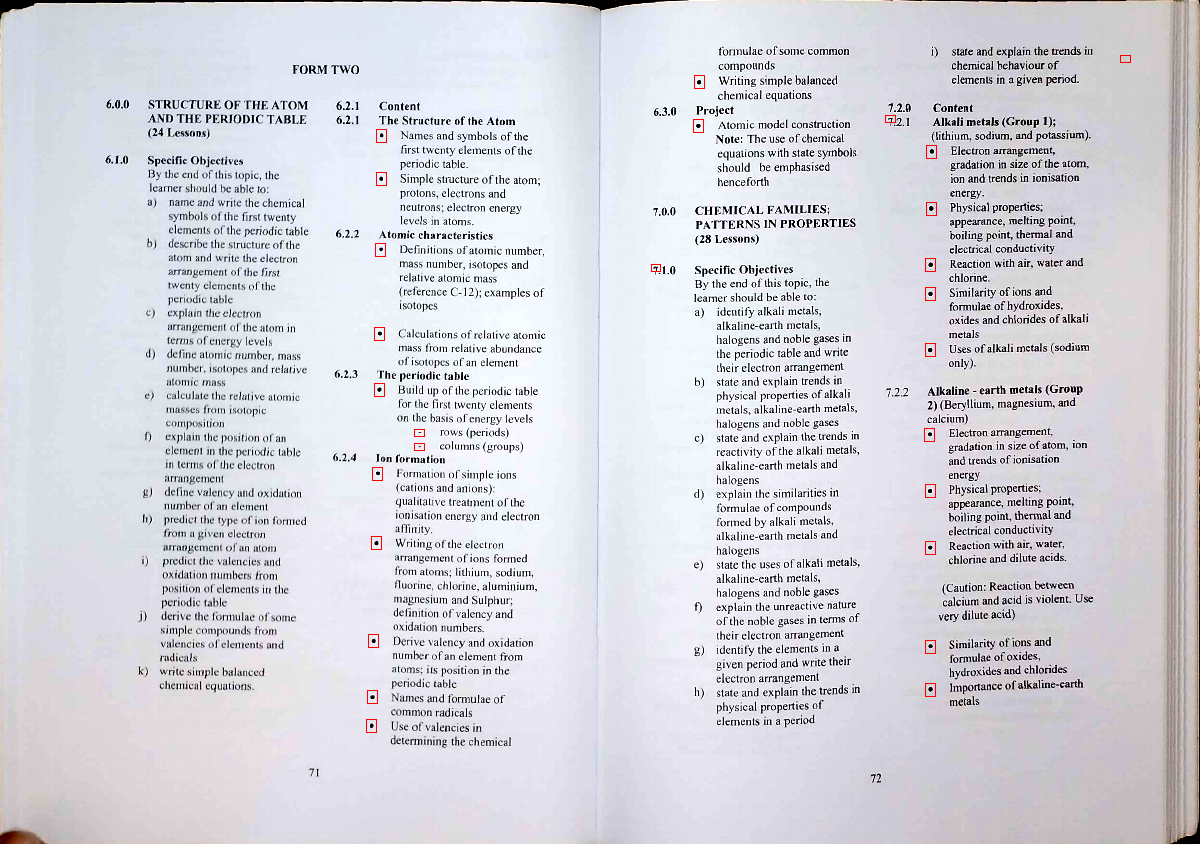

In [4]:
bullets = get_bullets_by_template(img)

if graph_everything:
    img.clear()
    for bullet in bullets:
        img.draw_box(bullet, width=1)
    
img if graph_everything else None

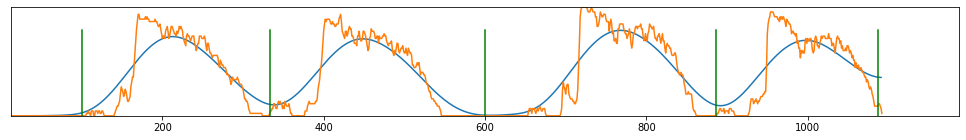

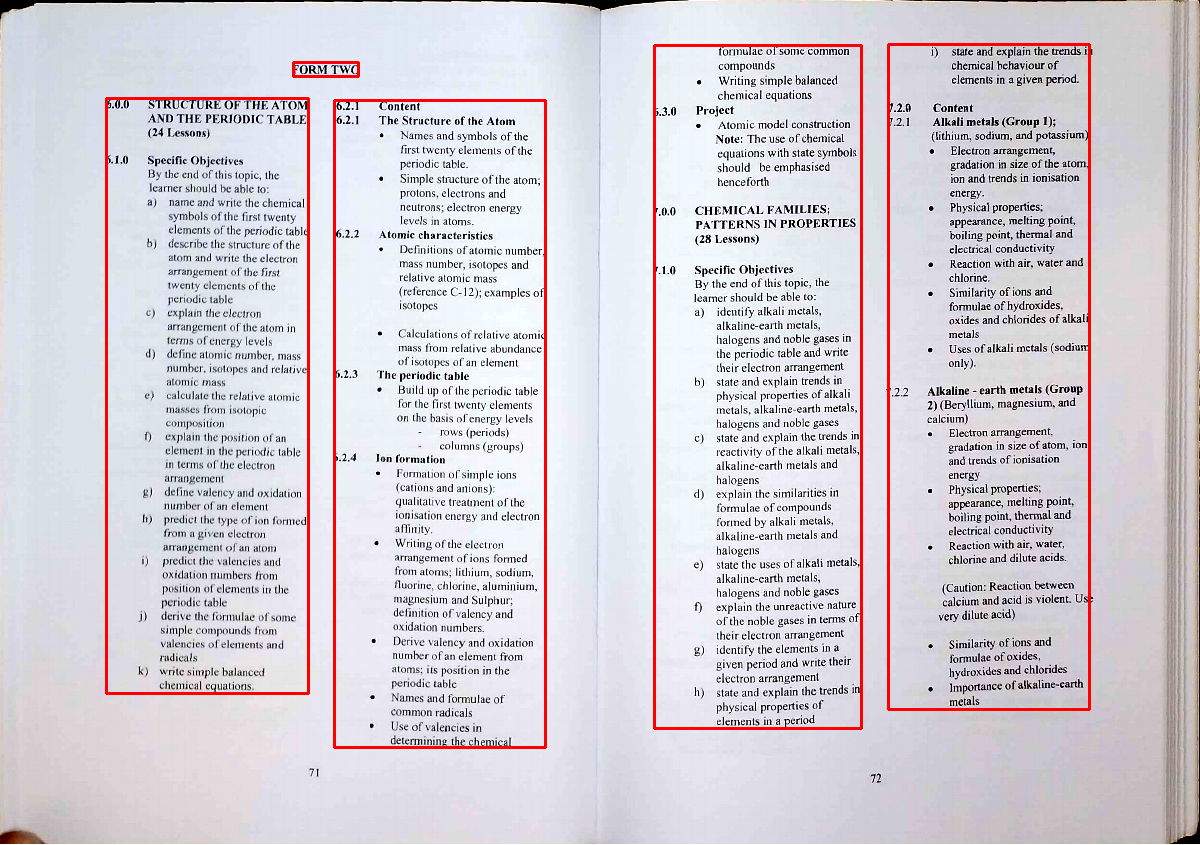

In [5]:
# extract the columns
columns = determine_column_bounding_boxes(
    page_data,
    plot_density=True,
    smoothing_granularity=6,
    left_shift_fraction=0.005,
    prominence=1,
    width=50
)

if graph_everything:
    img.clear()
    for column_box in columns:
        img.draw_box(column_box)
        
img if graph_everything else None

In [6]:
# extract the items by column, and join into one list
all_items = ItemList([])
for column_box in columns:
    items = extract_single_line_items_from_column(page_data, column_box=column_box, bullets=bullets)
    all_items += items

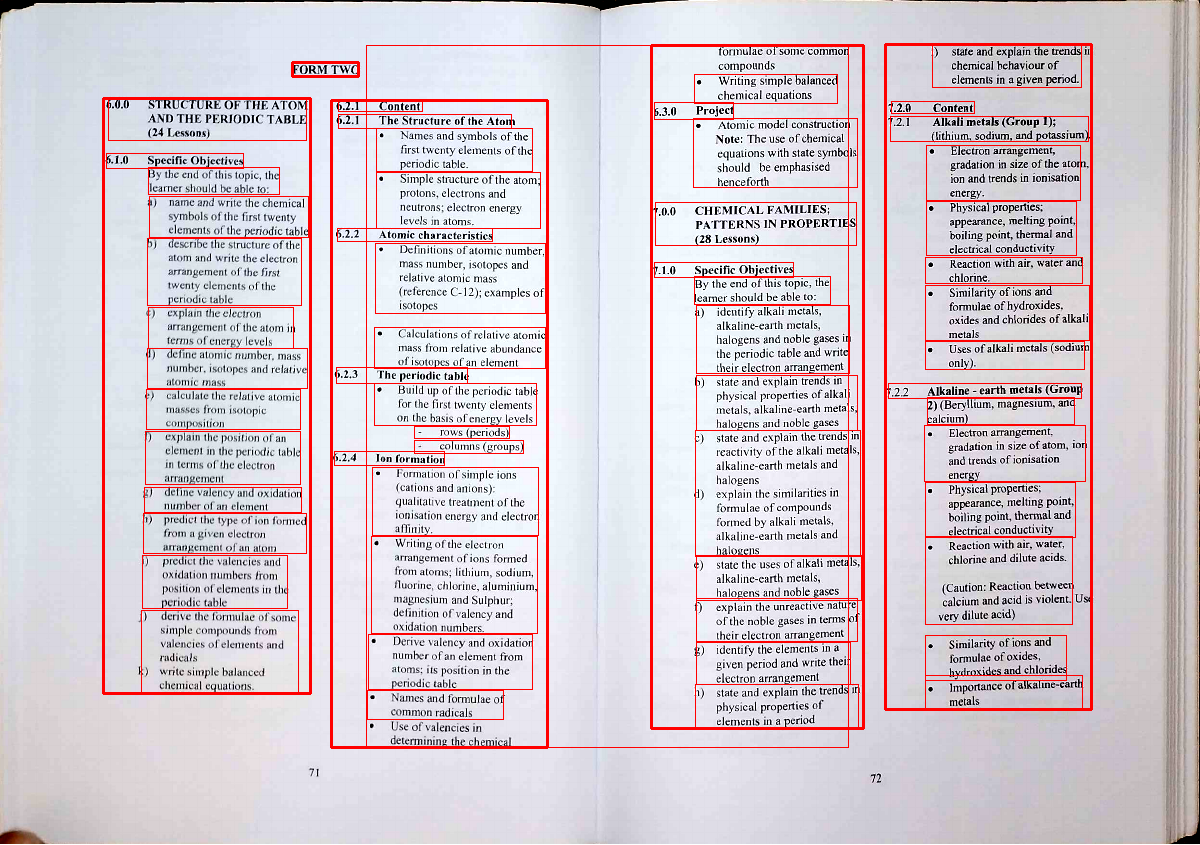

In [7]:
# go through and combine items together that belong together    
all_items = all_items.combine_lines()

if graph_everything:
    img.clear()
    for column_box in columns:
        img.draw_box(column_box.expanded(0.01))
    for item in all_items:
        img.draw_box(item.get_box(include_bullet=True), width=1)

img if graph_everything else None


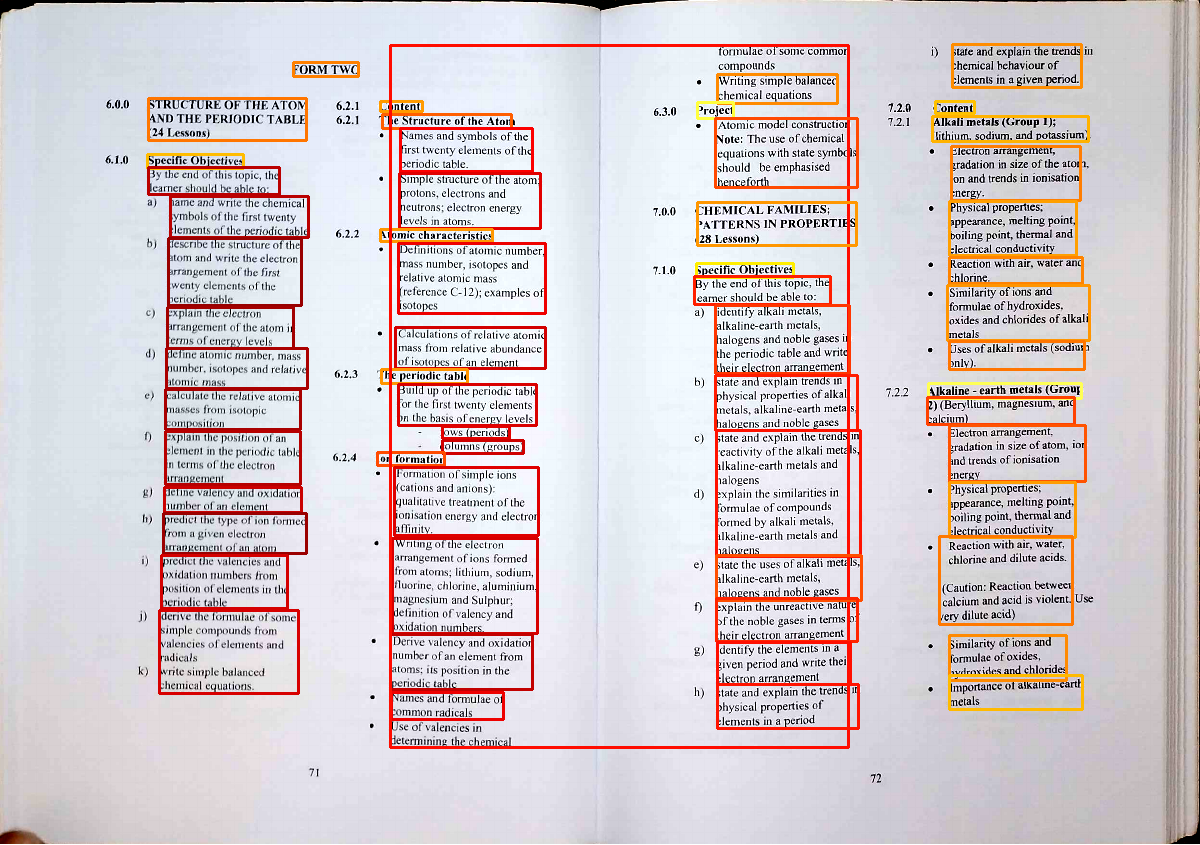

In [8]:
# annotate the lines with an estimate of their font weight
annotate_lines_with_font_weight(all_items, img)

if graph_everything:
    img.clear()
    for item in all_items:
        fontweight = int((item.average_fontweight() or 0) * 180)
        color = plt.cm.hot(fontweight)
        img.draw_box(item, color=color)
        
img if graph_everything else None

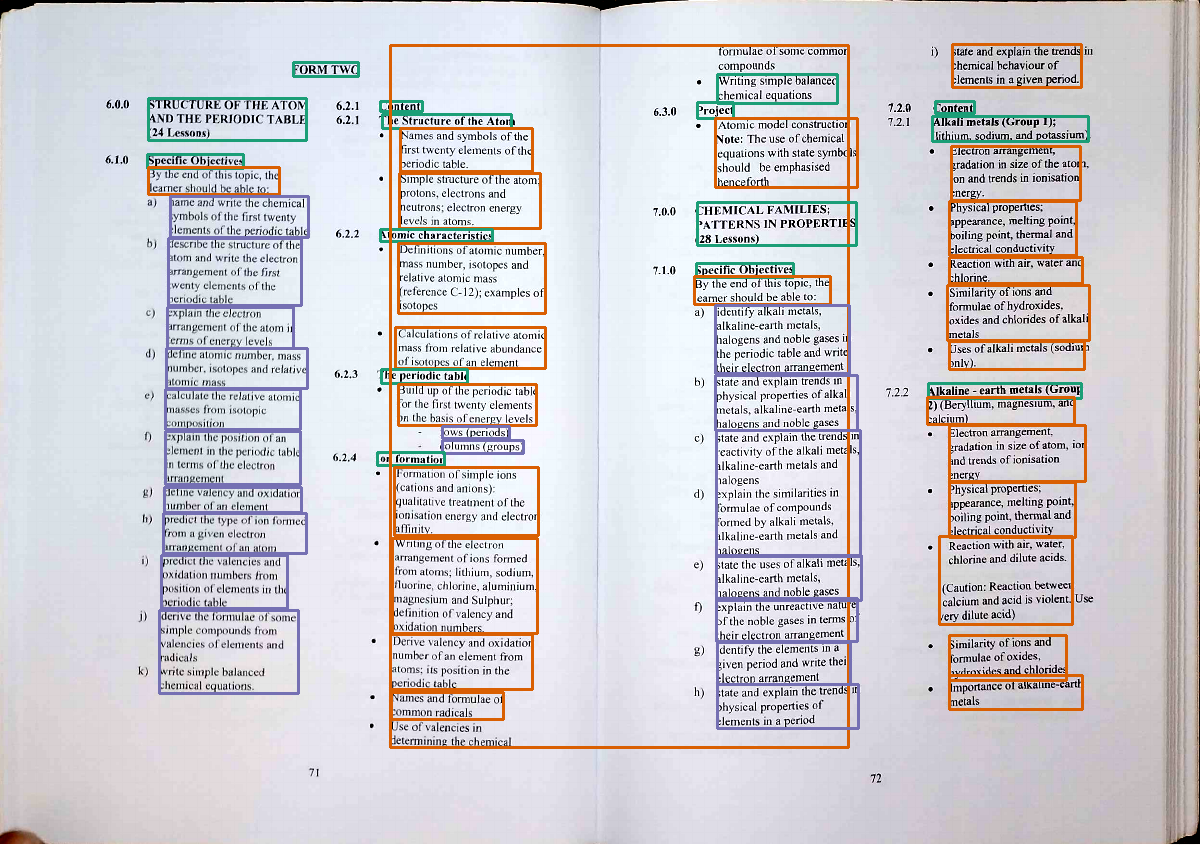

In [9]:
annotate_items_with_tab_levels_for_kicd(
    all_items,
    same_level_threshold=0.025,
    same_fontweight_threshold=0.25,
    print_debug_info=False,
)

if graph_everything:
    img.clear()
    for item in all_items:
        color = get_categorical_color(item.tabs)
        img.draw_box(item, color=color)
    
img if graph_everything else None

In [10]:
def render_to_markdown(items):
    text = ""
    for item in items:
        text += "\t" * item.tabs + "- "
        if item.bullet and item.bullet.text not in ["-", "•"]:
            text += item.bullet.text + " "
        text += item.get_text() + "\n"
    return text

print(render_to_markdown(all_items))


- FORM TWO
- 6.0.0 STRUCTURE OF THE ATOM AND THE PERIODIC TABLE (24 Lessons)
- 6.1.0 Specific Objectives
	- By the end of this topic, the learner should be able to:
		- a) name and write the chemical symbols of the first twenty elements of the periodic table
		- b) describe the structure of the atom and write the electron arrangement of the first twenty elements of the periodic table
		- c) explain the electron arrangement of the atom in terms of energy levels
		- d) define atomic number, mass number, isotopes and relative atomic mass
		- e) calculate the relative atomic masses from isotopic composition
		- 1) explain the position of an element in the periodic table in terms of the electron arrangement
		- 2) define valency and oxidation number of an element
		- h) predict the type of ion formed from a given electron arrangement of an atom
		- i) predict the valencies and oxidation numbers from position of elements in the periodic table
		- j) derive the formulae of some simple compoun

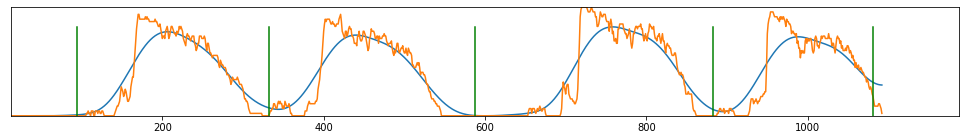

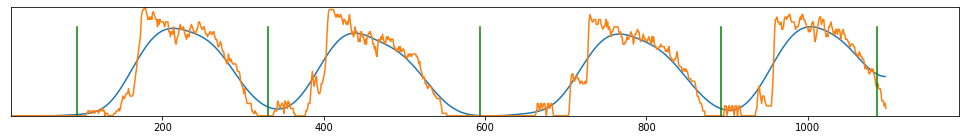

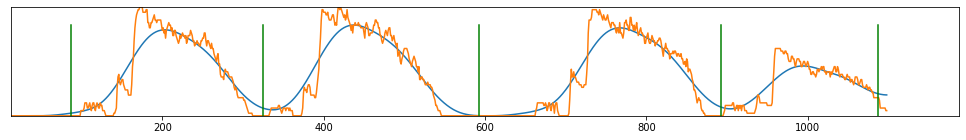

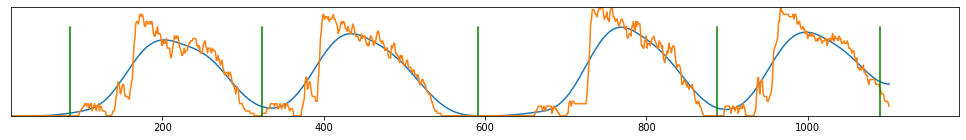

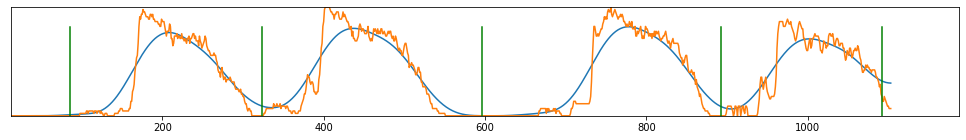

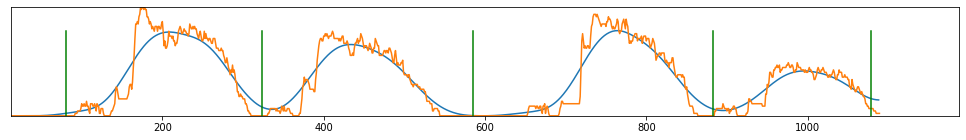

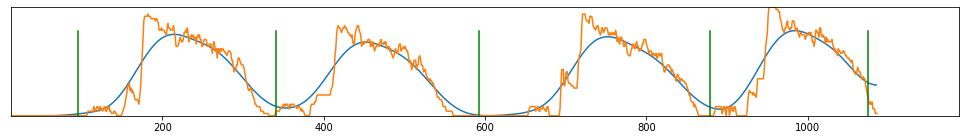

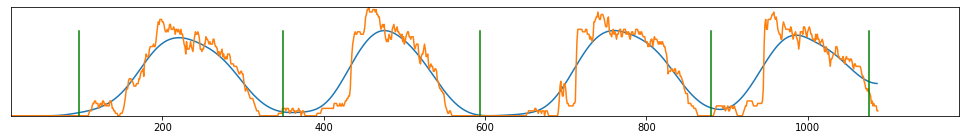

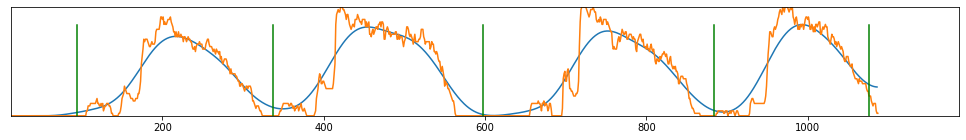

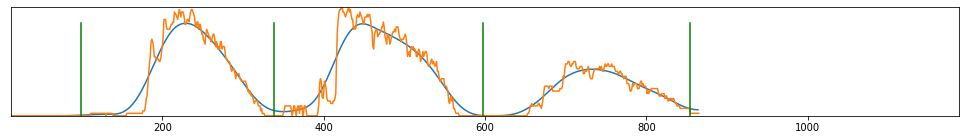

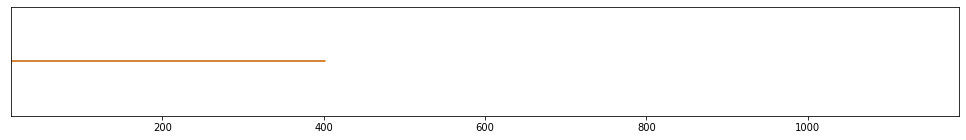

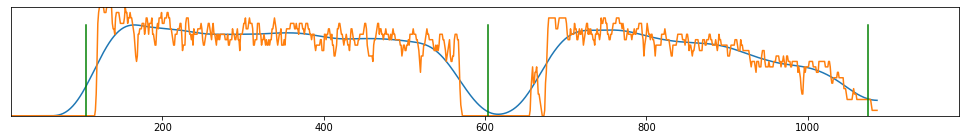

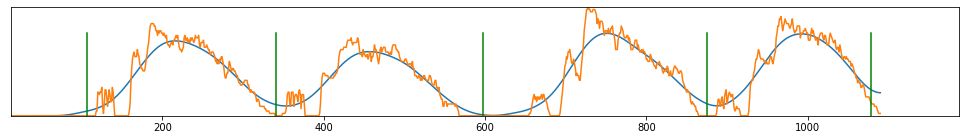

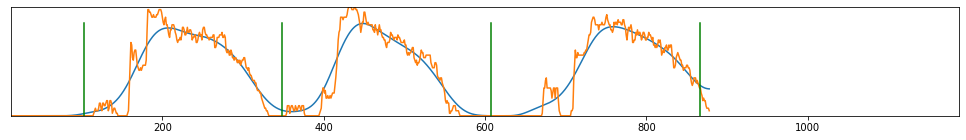

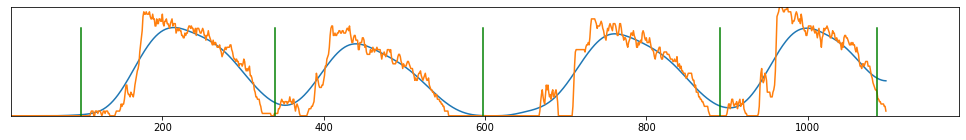

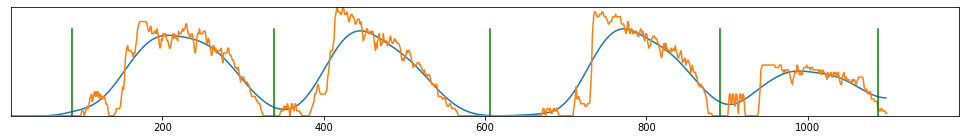

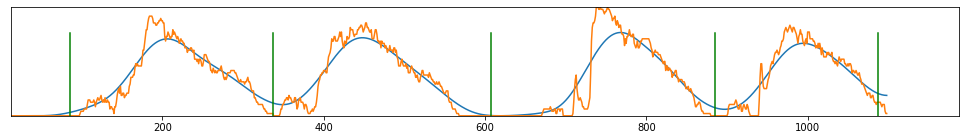

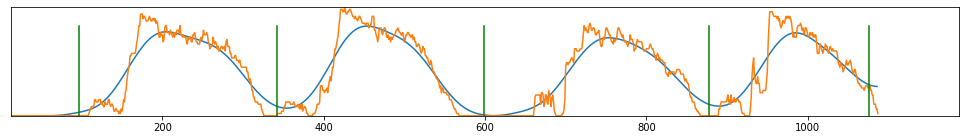

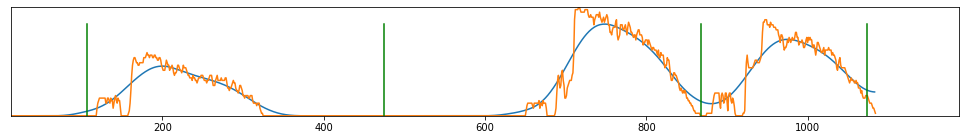

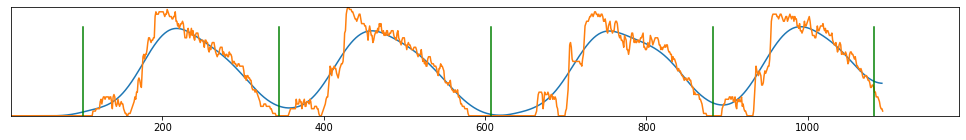

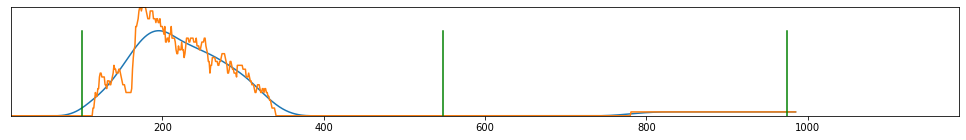

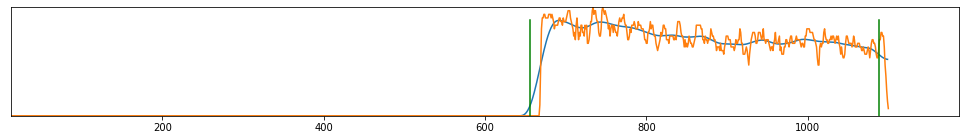

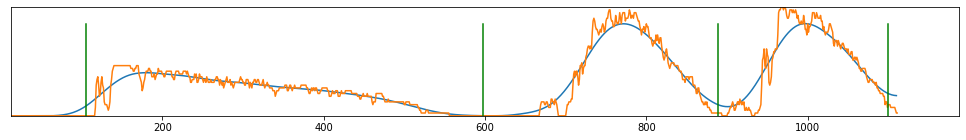

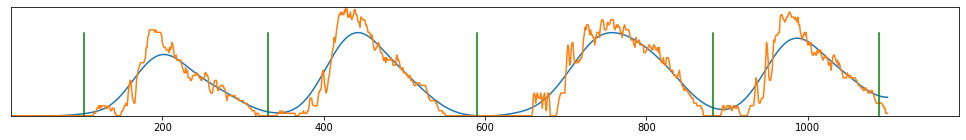

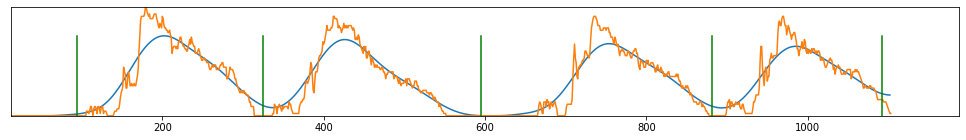

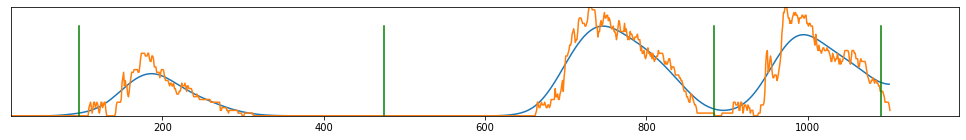

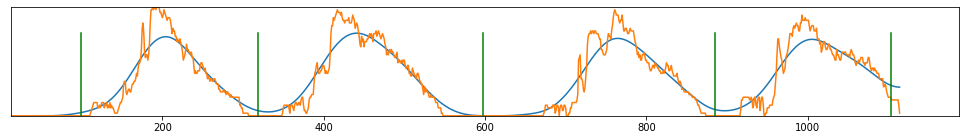

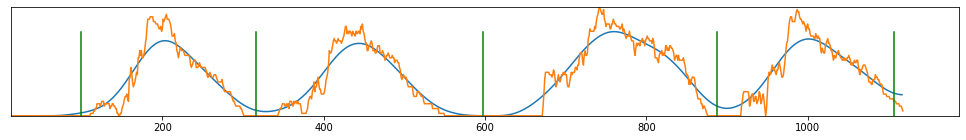

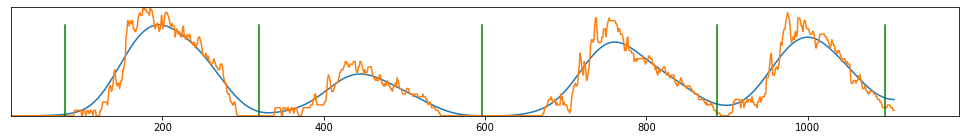

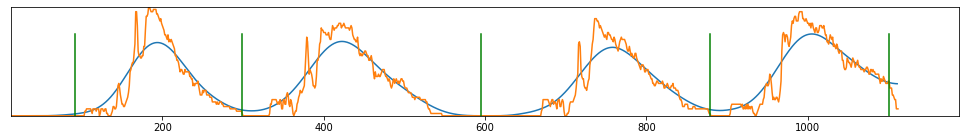

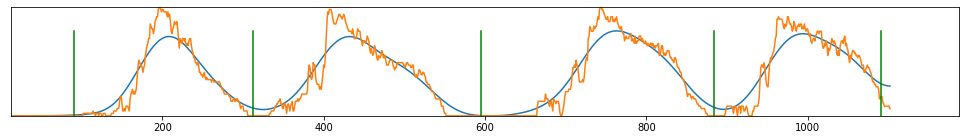

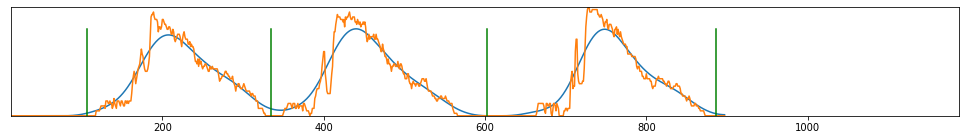

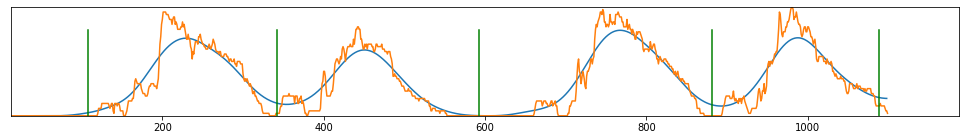

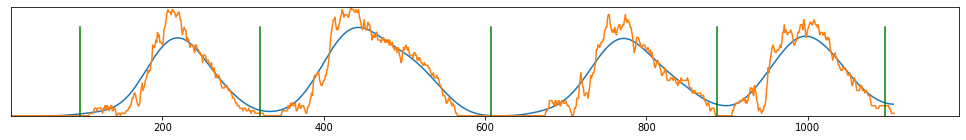

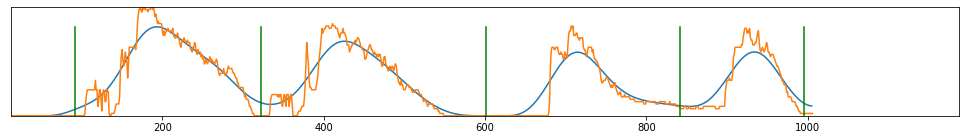

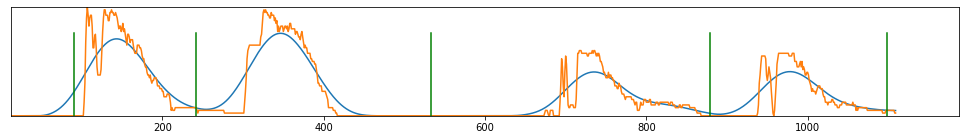

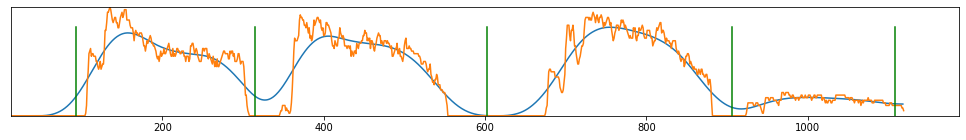

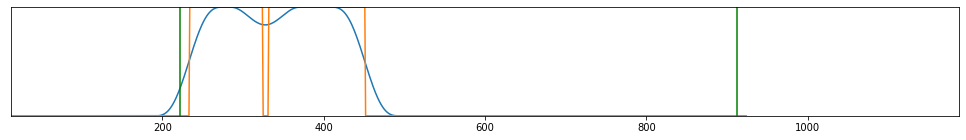

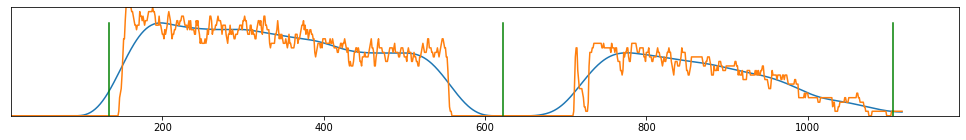

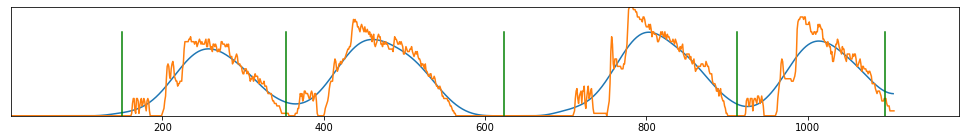

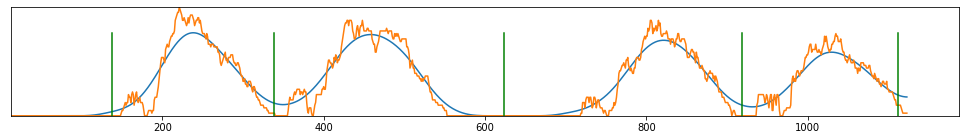

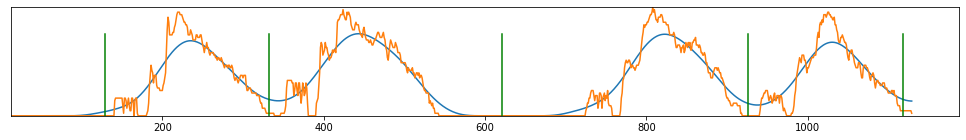

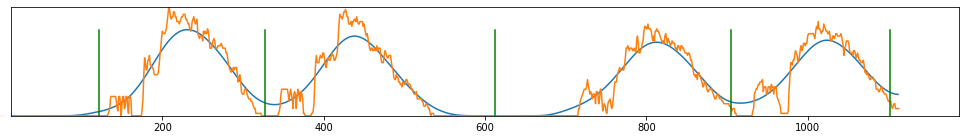

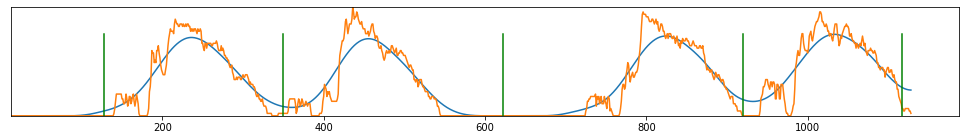

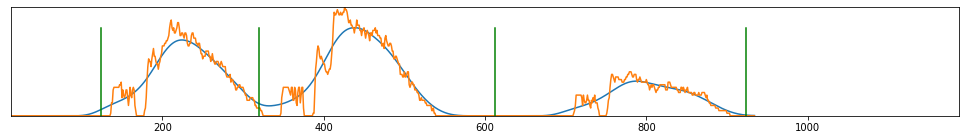

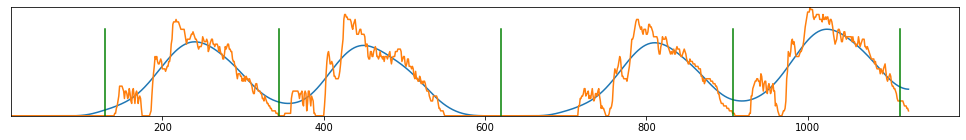

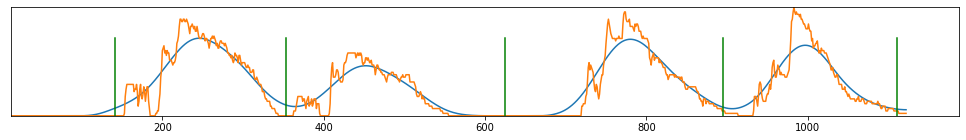

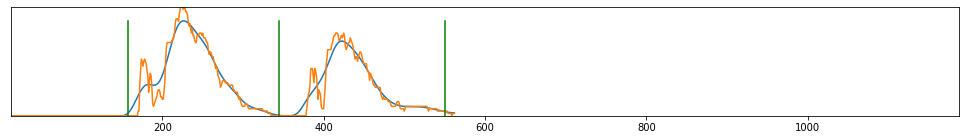

- FORM TWO
- 6.0.0 STRUCTURE OF THE ATOM AND THE PERIODIC TABLE (24 Lessons)
- 6.1.0 Specific Objectives
	- By the end of this topic, the learner should be able to:
		- a) name and write the chemical symbols of the first twenty elements of the periodic table
		- b) describe the structure of the atom and write the electron arrangement of the first twenty elements of the periodic table
		- c) explain the electron arrangement of the atom in terms of energy levels
		- d) define atomic number, mass number, isotopes and relative atomic mass
		- e) calculate the relative atomic masses from isotopic composition
		- 1) explain the position of an element in the periodic table in terms of the electron arrangement
		- 2) define valency and oxidation number of an element
		- h) predict the type of ion formed from a given electron arrangement of an atom
		- i) predict the valencies and oxidation numbers from position of elements in the periodic table
		- j) derive the formulae of some simple compoun

In [12]:
from kicd_utils import *

all_items = extract_markdown_from_document(doc, start_page=40)
print(render_to_markdown(all_items))
